이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

In [ ]:
# 코랩에서 메모리 부족을 피하기 위해 부동소수점 정밀도를 낮춥니다.
import tensorflow as tf

tf.keras.backend.set_floatx('float16')

# 신경망 시작하기: 분류와 회귀

## 영화 리뷰 분류: 이진 분류 예제

### IMDB 데이터셋

**IMDB 데이터셋 로드하기**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**리뷰를 다시 텍스트로 디코딩하기**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### 데이터 준비

**정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기**

In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### 신경망 모델 만들기

**모델 정의하기**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**모델 컴파일하기**

In [4]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### 훈련 검증

**검증 세트 준비하기**

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**모델 훈련하기**

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 77ms/step - loss: 0.5449 - accuracy: 0.7650 - val_loss: 0.4321 - val_accuracy: 0.8306
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3409 - accuracy: 0.8928 - val_loss: 0.3359 - val_accuracy: 0.8727
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2511 - accuracy: 0.9186 - val_loss: 0.2868 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2034 - accuracy: 0.9347 - val_loss: 0.2748 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1684 - accuracy: 0.9457 - val_loss: 0.2809 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1433 - accuracy: 0.9551 - val_loss: 0.2799 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1218 - accuracy: 0.9627 - val_loss: 0.3203 - val_accuracy: 0.8797
Epoch 8/20
30

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**훈련과 검증 손실 그리기**

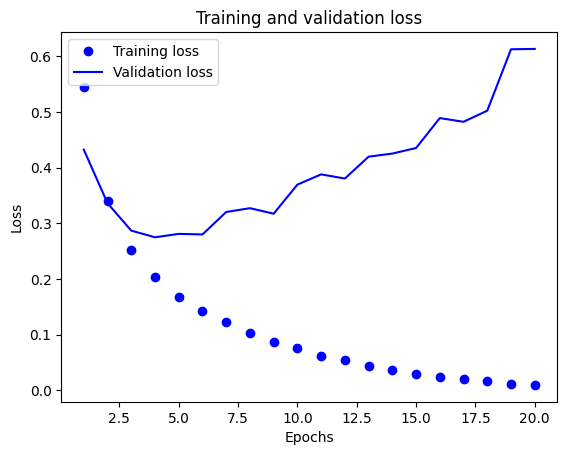

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**훈련과 검증 정확도 그리기**

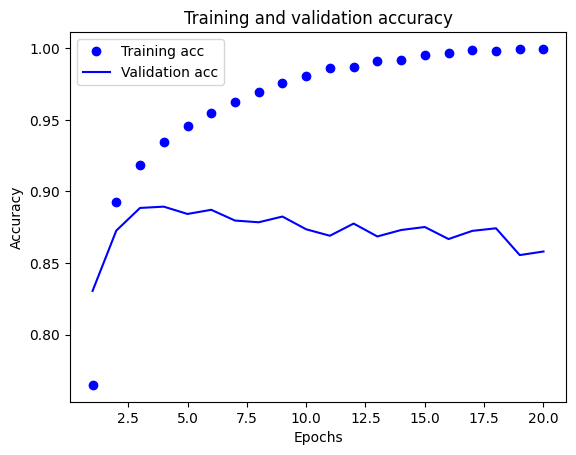

In [11]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**모델을 처음부터 다시 훈련하기**

In [12]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.4854 - accuracy: 0.8091
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2866 - accuracy: 0.8989
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2213 - accuracy: 0.9205
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2832 - accuracy: 0.8876


In [13]:
results

[0.28318285942077637, 0.8876000046730042]

### 훈련된 모델로 새로운 데이터에 대해 예측하기

In [14]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.20784423],
       [0.99935263],
       [0.6913637 ],
       ...,
       [0.09331548],
       [0.06716382],
       [0.5985717 ]], dtype=float32)

은닉층을 하나 또는 세 개 사용하기:

Sequential 모델의 아키텍처를 조정하여 다른 수의 은닉층을 시도해볼 수 있습니다. 예를 들어, 모델 정의에서 layers.Dense 인스턴스를 추가하거나 제거하여 은닉층의 수를 조절할 수 있습니다.
훈련 후에는 하나, 둘, 그리고 세 개의 은닉층을 사용한 모델의 검증 손실 및 정확도를 비교하여 어떤 구성이 가장 성능이 우수한지 확인할 수 있습니다.

은닉 유닛의 수를 늘리거나 줄이기:

각 은닉층의 유닛 수를 조정하여 모델의 용량(capacity)을 조절할 수 있습니다. layers.Dense 인스턴스의 units 매개변수를 수정하여 은닉층의 유닛 수를 변경할 수 있습니다.
은닉 유닛 수를 늘리면 모델이 복잡한 패턴을 학습할 수 있는 능력이 증가하지만, 과적합의 위험이 높아질 수 있습니다. 반면에 은닉 유닛 수를 줄이면 모델의 용량이 줄어들지만 과적합을 방지할 수 있습니다.

binary_crossentropy 대신 mse 손실 함수 사용하기:

모델 컴파일 시 사용되는 손실 함수를 binary_crossentropy에서 mse (Mean Squared Error)로 변경할 수 있습니다. 이는 model.compile() 함수의 loss 매개변수를 수정하여 수행할 수 있습니다.
MSE 손실 함수는 회귀 문제에서 주로 사용됩니다. 이진 분류 작업에 대해 이것이 binary crossentropy와 비교하여 어떻게 성능이 나오는지 확인할 수 있습니다.

relu 대신 tanh 활성화 함수 사용하기:

은닉층에서 사용되는 활성화 함수를 relu에서 tanh로 변경할 수 있습니다. 이는 layers.Dense 인스턴스의 activation 매개변수를 수정하여 수행할 수 있습니다.
Tanh 활성화 함수는 출력을 [-1, 1] 범위로 압축합니다. 이는 ReLU와는 다른 효과를 가져올 수 있습니다.

로지스틱 회귀 모델 피팅하기:

Sequential 모델을 사용하여 로지스틱 회귀를 구현할 수 있습니다. 하나의 layers.Dense 출력층만 사용하고 sigmoid 활성화 함수를 사용합니다.
로지스틱 회귀는 이진 분류를 위한 선형 모델입니다. 이러한 간단한 모델을 훈련하고 평가하여 신경망 모델과 비교해볼 수 있습니다.

### 추가 실험

### 정리

## 뉴스 기사 분류: 다중 분류 문제

### 로이터 데이터셋

**로이터 데이터셋 로드하기**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**로이터 데이터셋을 텍스트로 디코딩하기**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 1s 1us/step


In [ ]:
train_labels[10]

3

### 데이터 준비

**데이터 인코딩하기**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**레이블 인코딩하기**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### 모델 구성

**모델 정의하기**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**모델 컴파일하기**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### 훈련 검증

**검증 세트 준비하기**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**모델 훈련하기**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 29ms/step - loss: 2.8555 - accuracy: 0.4966 - val_loss: 1.9209 - val_accuracy: 0.6089
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.5479 - accuracy: 0.6865 - val_loss: 1.4043 - val_accuracy: 0.7051
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.1562 - accuracy: 0.7534 - val_loss: 1.2119 - val_accuracy: 0.7388
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.9419 - accuracy: 0.7974 - val_loss: 1.0879 - val_accuracy: 0.7651
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.7847 - accuracy: 0.8311 - val_loss: 1.0498 - val_accuracy: 0.7651
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6616 - accuracy: 0.8628 - val_loss: 0.9561 - val_accuracy: 0.7959
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5576 - accuracy: 0.8823 - val_loss: 0.9146 - val_accuracy: 0.8149
Epoch 8/20
16

**훈련과 검증 손실 그리기**

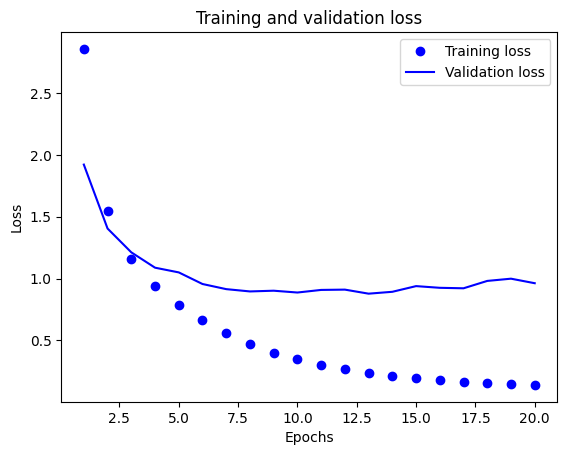

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**훈련과 검증 정확도 그리기**

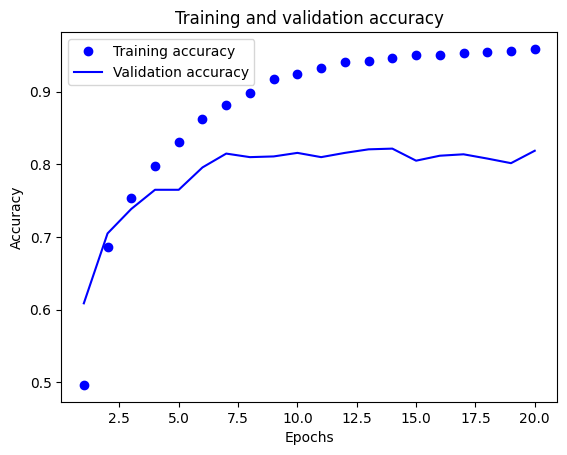

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**모델을 처음부터 다시 훈련하기**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 9ms/step - loss: 2.6152 - accuracy: 0.4507
Epoch 2/9
18/18 [==============================] - 0s 8ms/step - loss: 1.4795 - accuracy: 0.6821
Epoch 3/9
18/18 [==============================] - 0s 9ms/step - loss: 1.1260 - accuracy: 0.7500
Epoch 4/9
18/18 [==============================] - 0s 8ms/step - loss: 0.9209 - accuracy: 0.8022
Epoch 5/9
18/18 [==============================] - 0s 8ms/step - loss: 0.7642 - accuracy: 0.8359
Epoch 6/9
18/18 [==============================] - 0s 8ms/step - loss: 0.6392 - accuracy: 0.8613
Epoch 7/9
18/18 [==============================] - 0s 8ms/step - loss: 0.5444 - accuracy: 0.8828
Epoch 8/9
18/18 [==============================] - 0s 9ms/step - loss: 0.4631 - accuracy: 0.8994
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9180 - accuracy: 0.7891


In [ ]:
results

[0.91796875, 0.7890625]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19367764915405164

### 새로운 데이터로 예측하기

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

4

### 레이블과 손실을 다루는 다른 방법

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### 충분히 큰 중간 층을 두어야 하는 이유

**정보 병목이 있는 모델**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 2.9590 - accuracy: 0.1837 - val_loss: 2.1973 - val_accuracy: 0.5840
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.7695 - accuracy: 0.6040 - val_loss: 1.5518 - val_accuracy: 0.6201
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.3965 - accuracy: 0.6401 - val_loss: 1.4033 - val_accuracy: 0.6450
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.2285 - accuracy: 0.6880 - val_loss: 1.3076 - val_accuracy: 0.6660
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.1064 - accuracy: 0.7139 - val_loss: 1.2480 - val_accuracy: 0.7021
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0010 - accuracy: 0.7549 - val_loss: 1.2129 - val_accuracy: 0.7192
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9126 - accuracy: 0.7759 - val_loss: 1.1963 - val_accuracy: 0.7241
Epoch 8/20
63/63 [==

### 추가 실험

### 정리

더 크거나 작은 레이어 사용하기:

더 큰 레이어 사용 예시:

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(num_words,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])


더 작은 레이어 사용 예시:

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_words,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(46, activation='softmax')
])


단일 은닉층 또는 세 개의 은닉층 사용하기:

단일 은닉층 사용 예시:

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_words,)),
    layers.Dense(46, activation='softmax')
])


세 개의 은닉층 사용 예시:

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_words,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(46, activation='softmax')
])


원-핫 인코딩을 사용하지 않고 동일한 문제 해결하기:

정수 인코딩 및 손실 함수 변경 예시:

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_words,)),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 주택 가격 예측: 회귀 문제

### 보스턴 주택 가격 데이터셋

**보스턴 주택 데이터셋 로드하기**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 데이터 준비

**데이터 정규화하기**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### 모델 구성

**모델 정의하기**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### K-겹 검증을 사용한 훈련 검증

**K-겹 검증하기**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [ ]:
all_scores

[1.962890625, 2.4765625, 2.4921875, 2.42578125]

In [ ]:
np.mean(all_scores)

2.33935546875

**각 폴드의 검증 점수를 저장하기**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


**K-겹 검증 점수 평균을 기록하기**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**검증 점수 그래프 그리기**

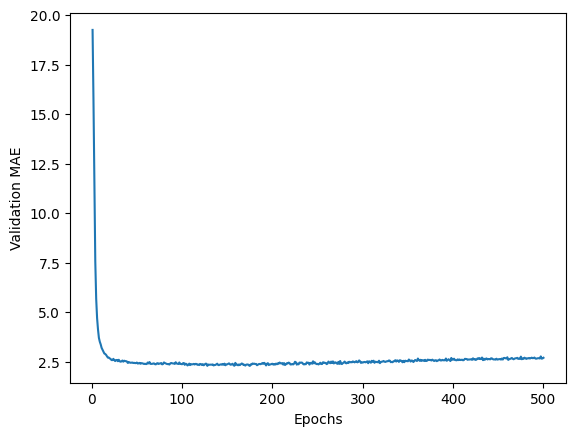

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**처음 10개의 데이터 포인트를 제외한 검증 점수 그래프 그리기**

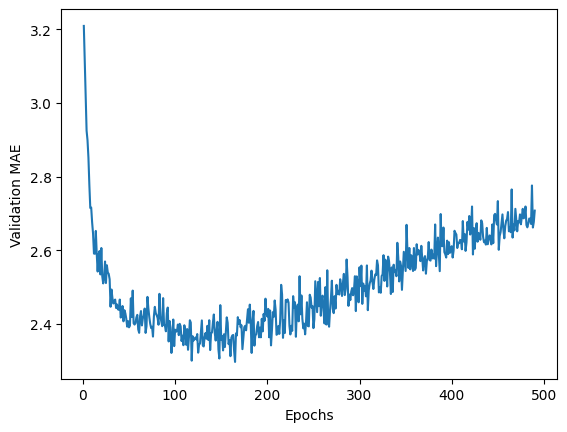

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**최종 모델 훈련하기**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 14.4219 - mae: 2.5352


In [ ]:
test_mae_score

2.53515625

### 새로운 데이터에 대해 예측하기

In [ ]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([8.93], dtype=float16)

### 정리

## 요약